In [113]:
from google.colab import files
uploaded = files.upload()

Saving heart_data.csv to heart_data (2).csv


In [114]:
import pandas as pd


In [115]:
df = pd.read_csv('heart_data.csv')

In [116]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [117]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [118]:
### EDA
df.shape

(5110, 12)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [120]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [121]:
# dropping the id column as it donot give any relavent information to this dataset
df.drop('id', axis = 1 , inplace = True)

In [122]:
# Changing datatype of hypertension, heart_disease, and stroke as they have categorical values
df['hypertension'] = df['hypertension'].astype(str)
df['heart_disease'] = df['heart_disease'].astype(str)
df['stroke'] = df['stroke'].astype(str)

In [123]:
df_numeric_features = df.select_dtypes(include='number')
df_numeric_features

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5105,80.0,83.75,NaN
5106,81.0,125.20,40.0
5107,35.0,82.99,30.6
5108,51.0,166.29,25.6


In [124]:
df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


In [126]:
df.describe(include = object)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


In [127]:
df.describe(include = object).T

,count,unique,top,freq
gender,5110,3,Female,2994
hypertension,5110,2,0,4612
heart_disease,5110,2,0,4834
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892
stroke,5110,2,0,4861


In [128]:
df.dtypes

,0
gender,object
age,float64
hypertension,object
heart_disease,object
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [129]:
### Data Cleaning treating Missing values
## only BMI has missing values

In [130]:
df['hypertension'].value_counts()

,count
hypertension,
0,4612
1,498


In [168]:
df['heart_disease'].value_counts()

,count
heart_disease,
0,7872
1,580


In [169]:
df['ever_married'].value_counts()

,count
ever_married,
1,6353
0,2099


In [ ]:
df['work_type'].value_counts()

In [ ]:
df

In [132]:
df.bmi.isnull().sum()

201

In [133]:
import numpy as np

In [170]:
df.bmi.replace(np.NaN,df.bmi.median() ,inplace = True)

<ipython-input-170-6b20edfb04fe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.bmi.replace(np.NaN,df.bmi.median() ,inplace = True)


In [135]:
df.bmi.isnull().sum()

0

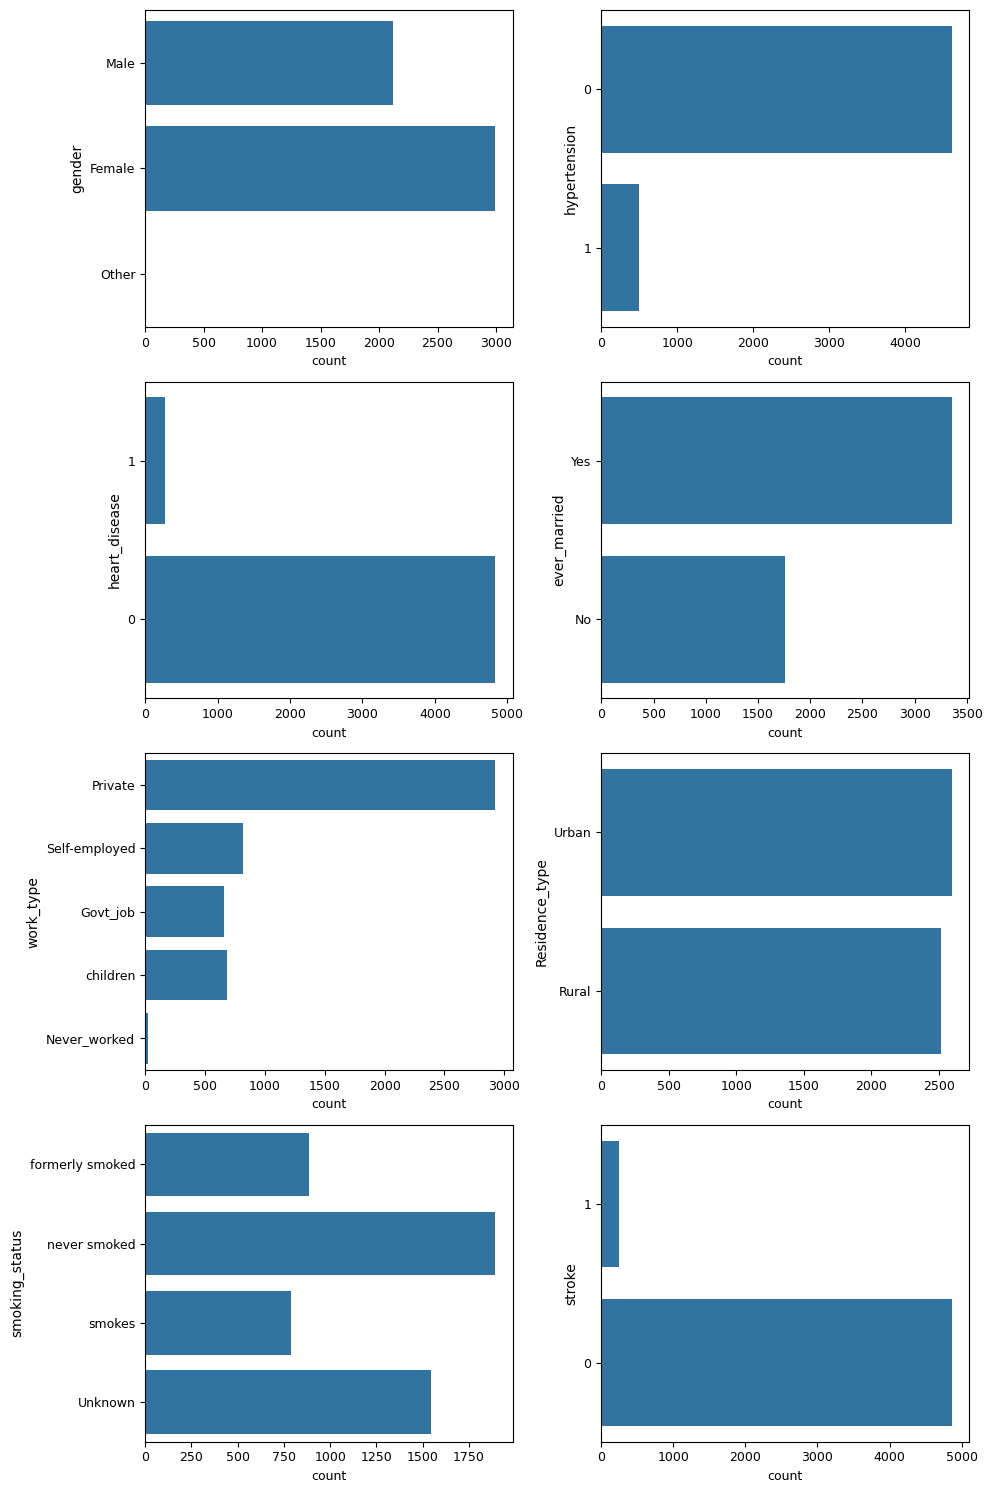

In [136]:
### Bivariate Analysis analysing relationship bw all Numerical Variables
import matplotlib.pyplot as plt
import seaborn as sns
df_categoric_features = df.select_dtypes(include='object').columns
# plot the count distribution for each categorical variable
# 'figsize' sets the figure size
fig, ax = plt.subplots(4, 2, figsize=(10, 15))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):

    # plot the count plot using countplot()
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(y=df[variable], ax=subplot)

    # set the y-axis labels
    # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 10)

# avoid overlapping of the plots using tight_layout()
plt.tight_layout()

# display the plot
plt.show()

<Axes: >

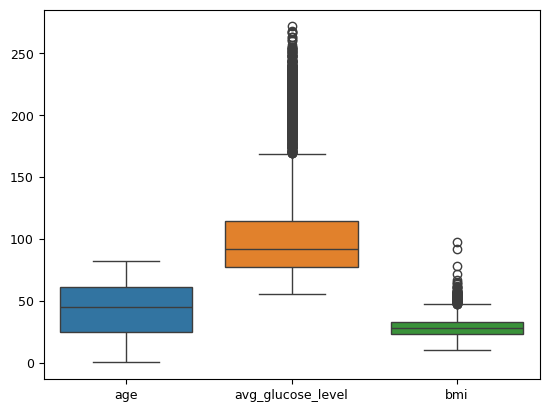

In [137]:
sns.boxplot(data=df_numeric_features)

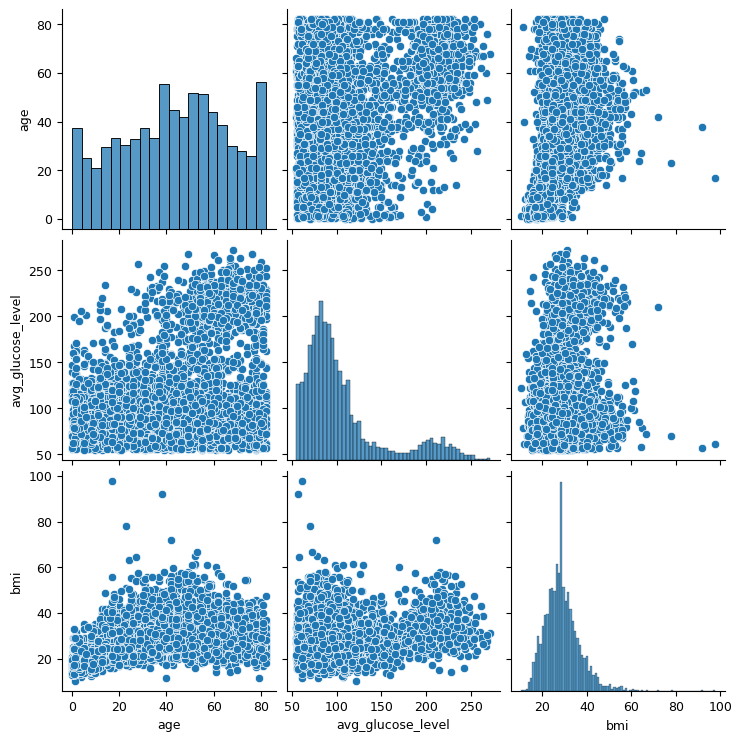

In [138]:
#### Bivariate Analysis
sns.pairplot(df)

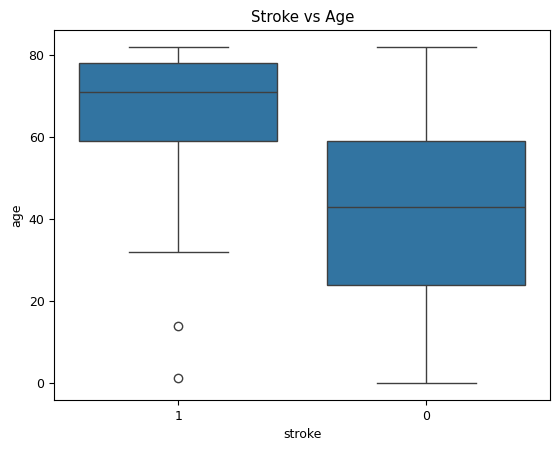

In [139]:
### Analysizing relationship bw Numerical and Target Variable
sns.boxplot(x="stroke", y="age", data=df)
plt.title("Stroke vs Age")
plt.show()

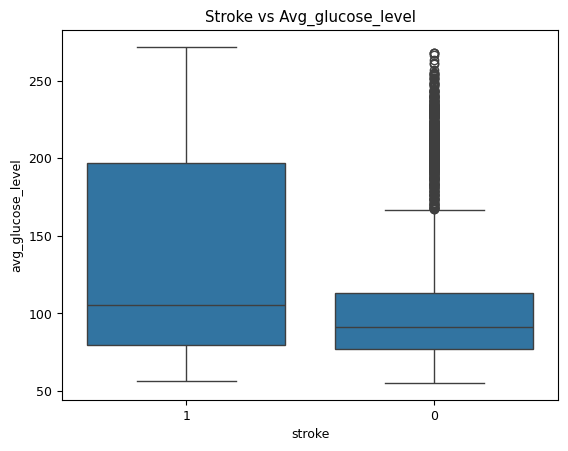

In [140]:
sns.boxplot(x="stroke", y="avg_glucose_level", data=df)
plt.title("Stroke vs Avg_glucose_level")
plt.show()

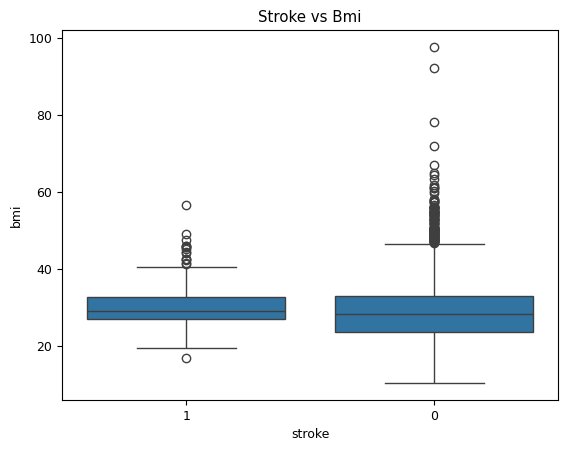

In [141]:
sns.boxplot(x="stroke", y="bmi", data=df)
plt.title("Stroke vs Bmi")

plt.show()

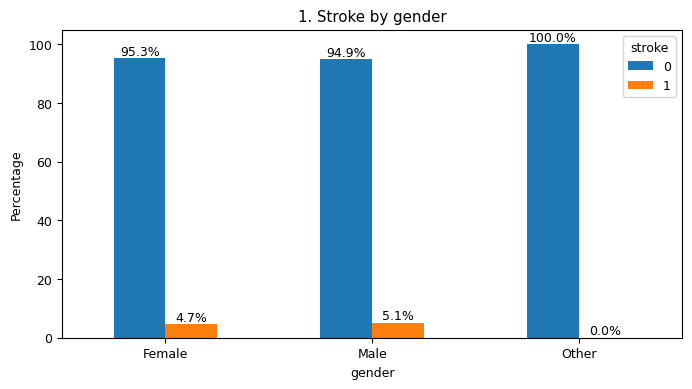

There is no significant difference in the incidence of stroke between males and females. However ,the percentage of females who have experienced a stroke is slightly lower than that of males. 

------------------------------------------------------------------------------------------------------------------------


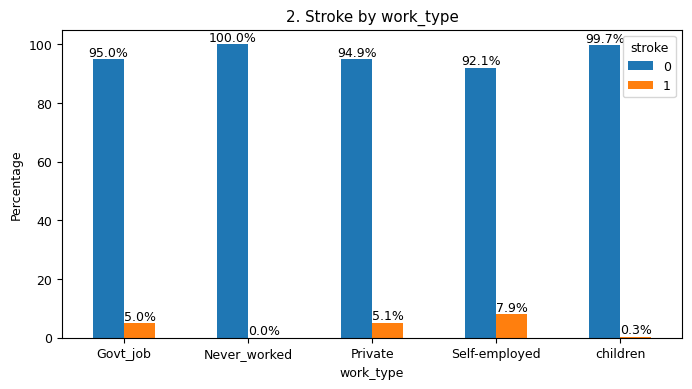

Individuals who are self-employed have a higher risk of experiencing a stroke compared to those in private or government jobs. 

------------------------------------------------------------------------------------------------------------------------


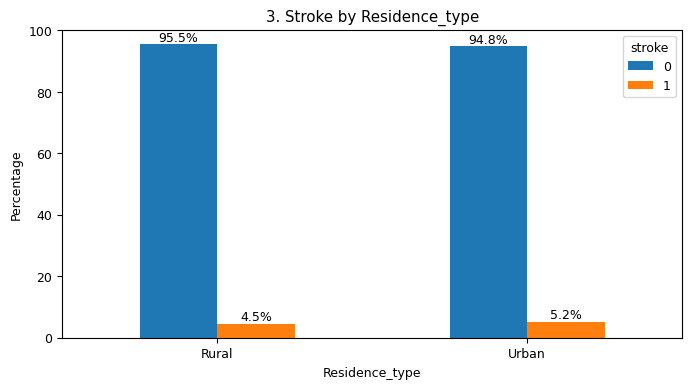

There is no significant difference in the incidence of stroke between individuals residing in urban or rural areas. 

------------------------------------------------------------------------------------------------------------------------


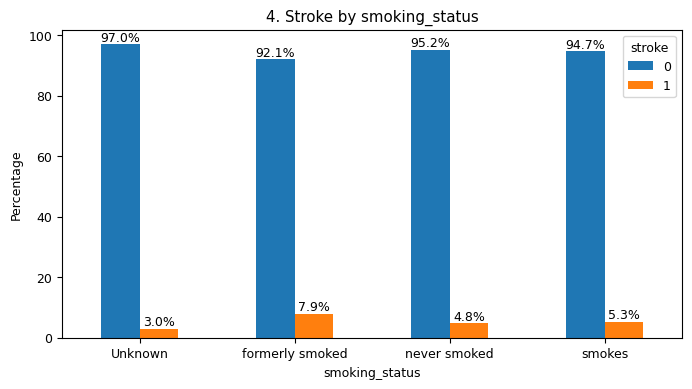

Smoking increases the risk of experiencing a stroke compared to being a former smoker or a non-smoker. 

------------------------------------------------------------------------------------------------------------------------


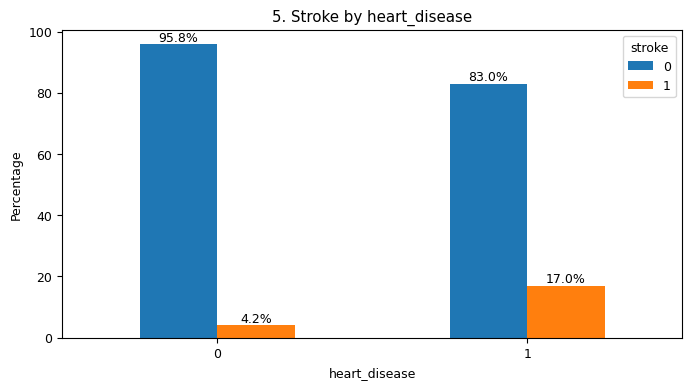

Having pre-existing conditions such as heart disease increases the risk of experiencing a stroke. 

------------------------------------------------------------------------------------------------------------------------


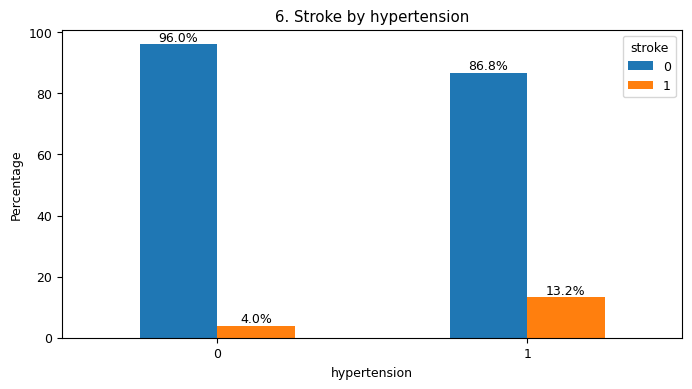

Having pre-existing conditions such as hypertension increases the risk of experiencing a stroke. 

------------------------------------------------------------------------------------------------------------------------


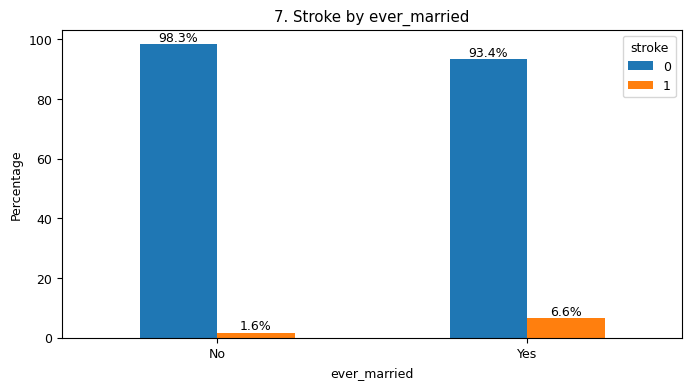

Married individuals have a higher risk of experiencing a stroke compared to those who are not married. 

------------------------------------------------------------------------------------------------------------------------


In [142]:
l=['gender','work_type','Residence_type','smoking_status','heart_disease','hypertension','ever_married']
lis =  ["There is no significant difference in the incidence of stroke between males and females. However ,the percentage of females who have experienced a stroke is slightly lower than that of males.",
"Individuals who are self-employed have a higher risk of experiencing a stroke compared to those in private or government jobs.",
"There is no significant difference in the incidence of stroke between individuals residing in urban or rural areas.",
"Smoking increases the risk of experiencing a stroke compared to being a former smoker or a non-smoker.",
"Having pre-existing conditions such as heart disease increases the risk of experiencing a stroke.",
"Having pre-existing conditions such as hypertension increases the risk of experiencing a stroke.",
"Married individuals have a higher risk of experiencing a stroke compared to those who are not married."]
plt.rcParams.update({'font.size': 9})
for i in range(len(l)):

    gender_counts = df[l[i]].value_counts(normalize=True) * 100
    stroke_counts = round(df.groupby(l[i])['stroke'].value_counts(normalize=True) * 100,2)
    crosstab_data = stroke_counts.unstack()

    # Create bar plot
    ax = crosstab_data.plot(kind='bar', figsize=(8,4))
    ax.set_title(f"{i+1}. Stroke by {l[i]}")
    ax.set_ylabel('Percentage')

    # Add data labels to the bars
    for j in ax.containers:
        ax.bar_label(j, labels=[f"{x:.1f}%" for x in j.datavalues], label_type='edge')
    plt.xticks(rotation=0)
    plt.show()

    print(lis[i],"\n")
    print("------------------------------------------------------------------------------------------------------------------------")

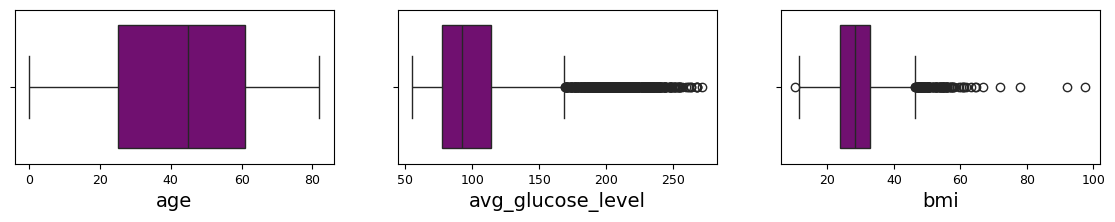

In [143]:
### Feature Engineering
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
df_num = df.select_dtypes(include='number')

fig, ax = plt.subplots(1,3, figsize=(14, 2))

# plot the boxplot using boxplot() from seaborn

for variable, subplot in zip(df_num.columns, ax.flatten()):

    # plot tghe box-plots
    z = sns.boxplot(x = df_num[variable], ax=subplot, color="purple")
    # set the x-axis laber
    z.set_xlabel(variable, fontsize = 14)

In [144]:
# obtain the first quartile
Q1 = df_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

age                  36.000
avg_glucose_level    36.845
bmi                   9.000
dtype: float64


In [145]:
df = df[(~((df.select_dtypes(include='number') < (df.select_dtypes(include='number').quantile(0.25) - 1.5 * (df.select_dtypes(include='number').quantile(0.75) - df.select_dtypes(include='number').quantile(0.25)))) | (df.select_dtypes(include='number') > (df.select_dtypes(include='number').quantile(0.75) + 1.5 * (df.select_dtypes(include='number').quantile(0.75) - df.select_dtypes(include='number').quantile(0.25))))).any(axis=1))]

In [146]:
# again checking the shape of the dataset
df.shape

(4391, 11)

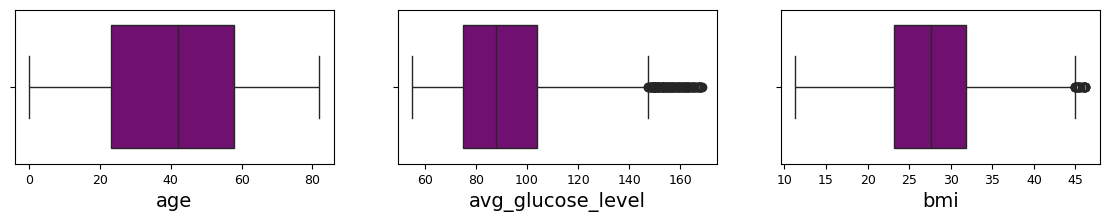

In [147]:
# plot the boxplot for each variable after removing the outliers
# subplots(): plot subplots
# figsize(): set the figure size
df_num = df.select_dtypes(include='number')

fig, ax = plt.subplots(1,3, figsize=(14, 2))

# plot the boxplot using boxplot() from seaborn

for variable, subplot in zip(df_num.columns, ax.flatten()):

    # plot tghe box-plots
    z = sns.boxplot(x = df_num[variable], ax=subplot, color="purple")
    # set the x-axis label
    z.set_xlabel(variable, fontsize = 14)

In [148]:
# Label Encoding of 'gender', 'ever_married' and 'Residence_type' because this columns have only 2 unique values
df.gender.unique(),df.ever_married.unique(),df.Residence_type.unique()


(array(['Male', 'Female', 'Other'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Rural', 'Urban'], dtype=object))

In [149]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[['gender', 'ever_married', 'Residence_type']] = df[['gender', 'ever_married','Residence_type']].apply(le.fit_transform)
df

<ipython-input-149-573e886ca32a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['gender', 'ever_married', 'Residence_type']] = df[['gender', 'ever_married','Residence_type']].apply(le.fit_transform)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
6,1,74.0,1,1,1,Private,0,70.09,27.400000,never smoked,1
7,0,69.0,0,0,0,Private,1,94.39,22.800000,never smoked,1
8,0,59.0,0,0,1,Private,0,76.15,28.893237,Unknown,1
9,0,78.0,0,0,1,Private,1,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


In [150]:
df[['gender', 'ever_married', 'Residence_type']] = df[['gender', 'ever_married', 'Residence_type']].astype('object')

<ipython-input-150-32de26459ae3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['gender', 'ever_married', 'Residence_type']] = df[['gender', 'ever_married', 'Residence_type']].astype('object')


In [151]:
# One hot encoding of 'work_type' and 'smoking_status' because this columns have more than two unique values
df.work_type.unique(),df.smoking_status.unique()

(array(['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'],
       dtype=object),
 array(['never smoked', 'Unknown', 'smokes', 'formerly smoked'],
       dtype=object))

In [152]:
df=pd.get_dummies(df, columns= ['work_type','smoking_status'],drop_first=True)

In [153]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,1,80.0,0,1,1,0,105.92,32.500000,1,False,True,False,False,False,True,False
6,1,74.0,1,1,1,0,70.09,27.400000,1,False,True,False,False,False,True,False
7,0,69.0,0,0,0,1,94.39,22.800000,1,False,True,False,False,False,True,False
8,0,59.0,0,0,1,0,76.15,28.893237,1,False,True,False,False,False,False,False
9,0,78.0,0,0,1,1,58.57,24.200000,1,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,False,True,False,False,False,True,False
5106,0,81.0,0,0,1,1,125.20,40.000000,0,False,False,True,False,False,True,False
5107,0,35.0,0,0,1,0,82.99,30.600000,0,False,False,True,False,False,True,False
5108,1,51.0,0,0,1,0,166.29,25.600000,0,False,True,False,False,True,False,False


In [154]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
df[['bmi','avg_glucose_level','age']] = standard_scale.fit_transform(df[['bmi','avg_glucose_level','age']])

In [155]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,1,1.734716,0,1,1,0,0.637380,0.714563,1,False,True,False,False,False,True,False
6,1,1.468544,1,1,1,0,-0.943830,-0.062699,1,False,True,False,False,False,True,False
7,0,1.246733,0,0,0,1,0.128550,-0.763759,1,False,True,False,False,False,True,False
8,0,0.803113,0,0,1,0,-0.676397,0.164877,1,False,True,False,False,False,False,False
9,0,1.645992,0,0,1,1,-1.452218,-0.550393,1,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1.734716,1,0,1,1,-0.341002,0.164877,0,False,True,False,False,False,True,False
5106,0,1.779078,0,0,1,1,1.488223,1.857595,0,False,False,True,False,False,True,False
5107,0,-0.261577,0,0,1,0,-0.374542,0.424995,0,False,False,True,False,False,True,False
5108,1,0.448216,0,0,1,0,3.301562,-0.337027,0,False,True,False,False,True,False,False


In [156]:
df.shape

(4391, 16)

In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [158]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print("Before SMOTE:")
print(y.value_counts())

print("After SMOTE:")
print(y_resampled.value_counts())

Before SMOTE:
stroke
0    4226
1     165
Name: count, dtype: int64
After SMOTE:
stroke
1    4226
0    4226
Name: count, dtype: int64


In [159]:
df=pd.concat([X_resampled,y_resampled],axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1.0,1.734716,0.0,1.0,1.0,0.0,0.637380,0.714563,False,True,False,False,False,True,False,1
1,1.0,1.468544,1.0,1.0,1.0,0.0,-0.943830,-0.062699,False,True,False,False,False,True,False,1
2,0.0,1.246733,0.0,0.0,0.0,1.0,0.128550,-0.763759,False,True,False,False,False,True,False,1
3,0.0,0.803113,0.0,0.0,1.0,0.0,-0.676397,0.164877,False,True,False,False,False,False,False,1
4,0.0,1.645992,0.0,0.0,1.0,1.0,-1.452218,-0.550393,False,True,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,0.0,0.571607,0.195359,0.0,1.0,0.804641,-1.177152,1.830149,False,False,False,False,False,True,False,1
8448,0.913251,1.603660,1.0,0.0,1.0,0.0,-1.538461,-0.354911,False,False,True,False,True,False,True,1
8449,0.0,1.612193,0.0,0.0,1.0,1.0,-0.755892,0.976449,False,False,True,False,False,True,False,1
8450,0.942905,1.564866,0.0,0.0,1.0,1.0,0.556407,-1.134327,False,True,False,False,False,False,True,1


In [160]:
# Set the threshold value
threshold = 0.5

# List of columns to apply the threshold
threshold_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']

# Iterate over the columns and apply the threshold
for column in threshold_columns:
    df[column] = df[column].apply(lambda x: 1 if x >= threshold else 0)

In [161]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Step 1: Load and preprocess your data
# X contains the features, y contains the target variable
X = df.drop("stroke", axis=1)
y = df["stroke"]
y = y.astype(int)

# Step 2: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## kNN Classifier


In [162]:
# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn.fit(X_train, y_train)

# Make predictions
knn_preds = knn.predict(X_test)

# Calculate evaluation metrics
knn_cm = confusion_matrix(y_test, knn_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds)
knn_recall = recall_score(y_test, knn_preds)
knn_f1 = f1_score(y_test, knn_preds)
knn_auc = roc_auc_score(y_test, knn_preds)

# Print the evaluation metrics for KNN classifier
print("K-Nearest Neighbors (KNN):")
print("Confusion Matrix:\n", knn_cm)
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("AUC Score:", knn_auc)
print()

K-Nearest Neighbors (KNN):
Confusion Matrix:
 [[1072  198]
 [   9 1257]]
Accuracy: 0.9183753943217665
Precision: 0.8639175257731959
Recall: 0.9928909952606635
F1 Score: 0.9239250275633958
AUC Score: 0.91849274172482



## Logistic Regression

In [163]:
# Initialize and fit models
lr = LogisticRegression()
lr.fit(X_train, y_train)
# Make predictions
lr_preds = lr.predict(X_test)
#lr_preds = lr_preds.astype(int)

# Calculate evaluation metrics
lr_cm = confusion_matrix(y_test, lr_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)
lr_auc = roc_auc_score(y_test, lr_preds)

# Print the evaluation metrics for each algorithm
print("Logistic Regression:")
print("Confusion Martix:\n", lr_cm)
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
print("Auc_score:", lr_auc)
print()

Logistic Regression:
Confusion Martix:
 [[ 999  271]
 [ 229 1037]]
Accuracy: 0.8028391167192429
Precision: 0.7928134556574924
Recall: 0.8191153238546603
F1 Score: 0.8057498057498057
Auc_score: 0.8028647485415035



## Decision Tree

In [164]:
# Initialize and fit the Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
dt_preds = dt.predict(X_test)

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)
dt_auc = roc_auc_score(y_test, dt_preds)
dt_confusion_matrix = confusion_matrix(y_test, dt_preds)

# Print the evaluation metrics for the Decision Tree classifier
print("Decision Tree Classifier:")
print("Confusion Matrix:\n", dt_confusion_matrix)
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("AUC Score:", dt_auc)

Decision Tree Classifier:
Confusion Matrix:
 [[1162  108]
 [  90 1176]]
Accuracy: 0.9219242902208202
Precision: 0.9158878504672897
Recall: 0.9289099526066351
F1 Score: 0.9223529411764706
AUC Score: 0.9219352912639475


In [165]:
# Get feature importances
feature_importances = dt.feature_importances_

# Print feature importance values
for feature_index, importance in enumerate(feature_importances):
    feature_name = f"Feature {feature_index + 1}"
    print(f"{feature_name}: {importance}")

Feature 1: 0.01978289635883434
Feature 2: 0.5375830342210062
Feature 3: 0.01620258641086868
Feature 4: 0.010977214513276627
Feature 5: 0.010143663395702893
Feature 6: 0.030560171134120906
Feature 7: 0.15435102068205525
Feature 8: 0.1374797855249608
Feature 9: 0.0
Feature 10: 0.015422276665710747
Feature 11: 0.0069818923937691795
Feature 12: 0.012340997828506608
Feature 13: 0.016591128860213966
Feature 14: 0.022147067057699938
Feature 15: 0.009436264953273864


In [166]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,1.734716,0,1,1,0,0.637380,0.714563,False,True,False,False,False,True,False,1
1,1,1.468544,1,1,1,0,-0.943830,-0.062699,False,True,False,False,False,True,False,1
2,0,1.246733,0,0,0,1,0.128550,-0.763759,False,True,False,False,False,True,False,1
3,0,0.803113,0,0,1,0,-0.676397,0.164877,False,True,False,False,False,False,False,1
4,0,1.645992,0,0,1,1,-1.452218,-0.550393,False,True,False,False,False,False,False,1


The Decision Tree classifier demonstrated superior performance compared to the logistic regression and knn classifier models. It achieved recall of 91.3970%, F1 score of 91.00196%. The area under the ROC curve (AUC) was 90.97036%, indicating the model's ability to distinguish between positive and negative instances.

The feature importance analysis revealed that feature 'Age" had the highest importance, followed by feature 'BMI' and feature "glucose_level'. This suggests that these features have the most significant impact on the classification task. Other features, such as feature 14 and feature 4, also contributed to the predictions but to a lesser extent.

Comparing the Decision Tree model with logistic regression and knn classifier, it consistently outperformed them in terms of predictive recall. This indicates the Decision Tree model's ability to generalize well to unseen data and make accurate predictions.

Overall, the Decision Tree classifier's robust performance suggests its suitability for the given classification problem, demonstrating its potential to accurately classify new, unseen instances.

In [167]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

# Example DataFrame
# df = pd.DataFrame(...)  # Load or create your pandas DataFrame here

# Separate features and target
X = df.drop('stroke', axis=1)  # Replace 'target_column' with your actual target column
y = df['stroke']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier()

# Set up the parameter grid for Randomized Search
param_distributions = {
    'n_estimators': randint(50, 200),         # Number of trees in the forest
    'max_depth': randint(5, 30),              # Maximum depth of each tree
    'min_samples_split': randint(2, 10),      # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 10),       # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Set up the Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,          # Number of parameter settings sampled
    scoring='accuracy', # Scoring metric to optimize
    cv=5,               # Number of cross-validation folds
    random_state=42,
    n_jobs=-1           # Use all available cores
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'max_depth': 23, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 94}
Best Cross-Validation Score: 0.9371408922534628
